# Churn Prediction
Churn Prediction is one of the most popular big data use cases in the business world, and it helps identify customers who are most likely to cancel a subscription to a service.

(If Churn = 1, customer canceled subscription. If Churn = 0, customer continues subscription.)

# Data Used

For this analysis, the open source Cell2Cell data prepared by the Teradata center for customer relationship management at Duke University was obtained from Kaggle.

Our data consists of 51,047 samples / rows and 58 features / columns.

# Purpose of the study

Tried to predict and analyzed Customer Loss with classification algorithms.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
train=pd.read_csv('cell2celltrain.csv')
test=pd.read_csv('cell2cellholdout.csv')

In [3]:
test.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000006,NaN,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,...,0,5,No,1,150,No,5-Low,Other,Other,No
1,3000018,NaN,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,...,0,6,No,2,80,No,1-Highest,Other,Professional,No
2,3000034,NaN,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,...,0,4,No,3,10,No,3-Good,Suburban,Crafts,Yes
3,3000070,NaN,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,...,0,4,No,1,200,No,1-Highest,Other,Other,No
4,3000074,NaN,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,...,0,3,No,0,10,No,1-Highest,Suburban,Other,No


In [4]:
train.describe()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,5.104700e+04,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50680.000000,50680.000000,51047.000000,...,51046.000000,51046.000000,51046.000000,50138.000000,50138.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,3.201957e+06,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,6.011489,...,1.805646,1.558751,380.545841,31.338127,21.144142,0.037201,0.018277,0.052070,4.324524,0.053911
std,1.169056e+05,44.507336,529.871063,23.848871,2.228546,96.588076,9.818294,257.514772,39.574915,9.043955,...,1.331173,0.905932,253.801982,22.094635,23.931368,0.206483,0.142458,0.307592,3.138236,0.383147
min,3.000002e+06,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,...,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100632e+06,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,0.700000,...,1.000000,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.201534e+06,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,...,1.000000,1.000000,329.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,3.305376e+06,71.065000,723.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,7.700000,...,2.000000,2.000000,515.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,3.399994e+06,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,...,24.000000,15.000000,1812.000000,99.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.000000


In [5]:
for i in train.columns:
      if train[i].dtype=='object':
            print(pd.DataFrame(train[i].value_counts()))

     Churn
No   36336
Yes  14711
           ServiceArea
NYCBRO917         1684
HOUHOU281         1510
DALDAL214         1498
NYCMAN917         1182
APCFCH703          783
...                ...
NCRMON704            1
OHIOXF513            1
SFRVAC707            1
ATLSEN662            1
ATLWMP870            1

[747 rows x 1 columns]
     ChildrenInHH
No          38679
Yes         12368
     HandsetRefurbished
No                43956
Yes                7091
     HandsetWebCapable
Yes              46046
No                5001
     TruckOwner
No        41524
Yes        9523
     RVOwner
No     46894
Yes     4153
         Homeownership
Known            33987
Unknown          17060
     BuysViaMailOrder
No              32596
Yes             18451
     RespondsToMailOffers
No                  31821
Yes                 19226
     OptOutMailings
No            50295
Yes             752
     NonUSTravel
No         48168
Yes         2879
     OwnsComputer
No          41583
Yes          9464
     Ha

# Data Analysis


In [6]:
train.drop('CustomerID',axis=1, inplace=True)

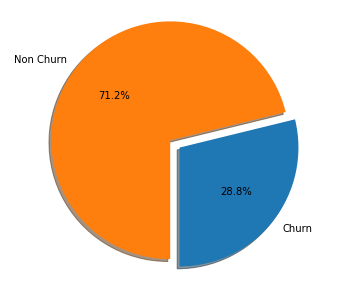

In [7]:
churn=train[train['Churn']=='Yes'].shape[0]
non_churn= train[train['Churn']=='No'].shape[0]

slices=[churn,non_churn]
labels=['Churn','Non Churn']
explode=[0.1,0]

fig1, ax1 = plt.subplots(figsize=(6, 5))
ax1.pie(slices, explode=explode, labels=labels,autopct='%1.1f%%',shadow=True, startangle=270)
ax1.axis('equal')  
plt.show()


# Customer churn is 28.8%. The data is unbalanced.

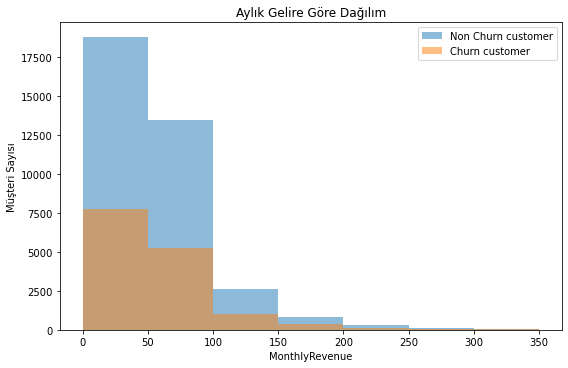

In [8]:
fig = plt.subplots(figsize=(8, 5))
plt.hist(train[train['Churn']=='No']['MonthlyRevenue'],bins=[0,50,100,150,200,250,300,350],alpha=0.5, label='Non Churn customer')
plt.hist(train[train['Churn']=='Yes']['MonthlyRevenue'],bins=[0,50,100,150,200,250,300,350],alpha=0.5,label='Churn customer')
plt.ylabel("Müşteri Sayısı")
plt.xlabel("MonthlyRevenue")
plt.legend()
plt.tight_layout()
plt.title('Aylık Gelire Göre Dağılım')
plt.show()


In [9]:
tenure_churn = train.MonthsInService[train.Churn == 'Yes'].value_counts()
tenure_no_churn = train.MonthsInService[train.Churn == 'No'].value_counts()
tenure = pd.merge(tenure_churn.reset_index(), tenure_no_churn.reset_index(), on='index')
tenure = tenure.sort_values(by='index')
tenure = tenure.reset_index().drop(columns='level_0')
tenure.columns

Index(['index', 'MonthsInService_x', 'MonthsInService_y'], dtype='object')

No handles with labels found to put in legend.


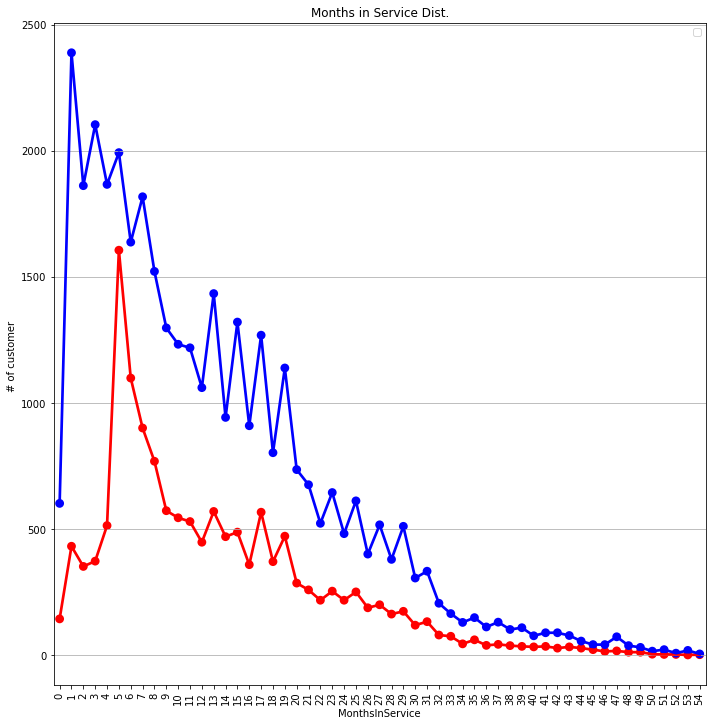

In [10]:
plt.figure(figsize=(10,10))
plt.grid(True)
sns.pointplot(x=tenure.index, y=tenure.MonthsInService_x, color='red',label='Churn customer')
sns.pointplot(x=tenure.index, y=tenure.MonthsInService_y, color='blue',label='Non Churn customer')
plt.xticks(rotation=90)
plt.ylabel("# of customer ")
plt.xlabel("MonthsInService")
plt.legend()
plt.tight_layout()
plt.title('Months in Service Dist.')
plt.show()

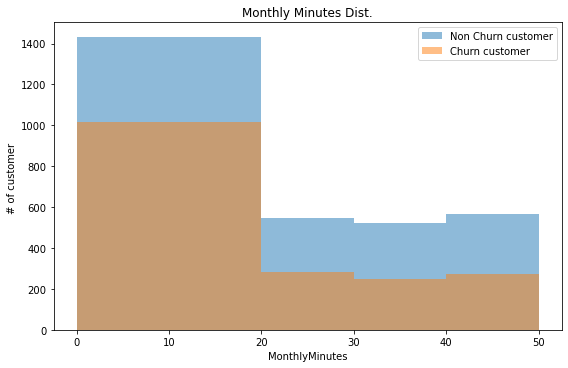

In [11]:
fig = plt.subplots(figsize=(8, 5))
plt.hist(train[train['Churn']=='No']['MonthlyMinutes'],bins=[0,20,30,40,50],alpha=0.5, label='Non Churn customer')
plt.hist(train[train['Churn']=='Yes']['MonthlyMinutes'],bins=[0,20,30,40,50],alpha=0.5,label='Churn customer')
plt.ylabel("# of customer ")
plt.xlabel("MonthlyMinutes")
plt.legend()
plt.tight_layout()
plt.title('Monthly Minutes Dist.')
plt.show()

In [12]:
train['HandsetPrice'] = train['HandsetPrice'].replace('Unknown', np.nan)
test['HandsetPrice'] = test['HandsetPrice'].replace('Unknown', np.nan)

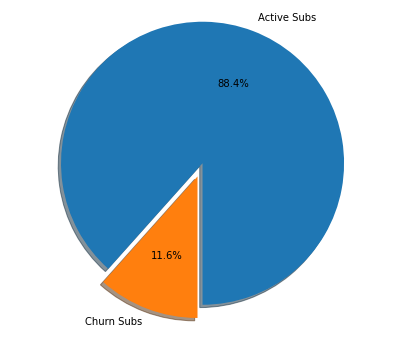

In [13]:
#The customer can have multiple subscriptions and can close one of the subscriptions.

train['ChurnSubs']=train['UniqueSubs']-train['ActiveSubs']


# There are no columns in the data set indicating the loss of subscription (ChurnSubs).
# This column is obtained when active subscriptions are subtracted from the number of subscriptions owned by the customer.

slices=[train['ActiveSubs'].sum(),train['ChurnSubs'].sum()] 
labels=['Active Subs','Churn Subs']
explode=[0,0.1]

fig1, ax1 = plt.subplots(figsize=(7, 6))
ax1.pie(slices, explode=explode, labels=labels,autopct='%1.1f%%',shadow=True, startangle=270)
ax1.axis('equal')  
plt.show()


# Pie chart used to show how many subscribers are active and how many have lost subscribers

Number of customers making calls to retention team: 1745
Number of customers lost after calls : 786
Number of customers not lost after making calls : 959
Success rate of retention calls % : 55


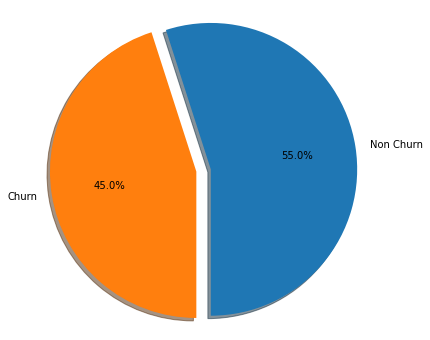

In [14]:
retention_df=train[train['MadeCallToRetentionTeam']=='Yes']
print ("Number of customers making calls to retention team: {}".format(train[train['MadeCallToRetentionTeam']=='Yes'].shape[0]))
print("Number of customers lost after calls : {}".format(train[(train['MadeCallToRetentionTeam']=='Yes') & (train['Churn']=='Yes')].shape[0]))
print("Number of customers not lost after making calls : {}".format(train[(train['MadeCallToRetentionTeam']=='Yes') & (train['Churn']=='No')].shape[0]))
print ("Success rate of retention calls % : {}".format(round(100*560/1017)))

slices=[retention_df[retention_df['Churn']=='No'].shape[0],retention_df[retention_df['Churn']=='Yes'].shape[0]]
labels=['Non Churn','Churn']
explode=[0,0.1]

fig1, ax1 = plt.subplots(figsize=(7, 6))
ax1.pie(slices, explode=explode, labels=labels,autopct='%1.1f%%',shadow=True, startangle=270)
ax1.axis('equal')  
plt.show()


In [15]:
retention_offer=train[train['RetentionOffersAccepted']>0]

The number of customers who accepted the retention call offer : 881
Number of customers lost after accepting the retention call: 362
Number of customers not lost after accepting the retention call : 519
Success rate of the retention call proposal: 0.5891032917139614


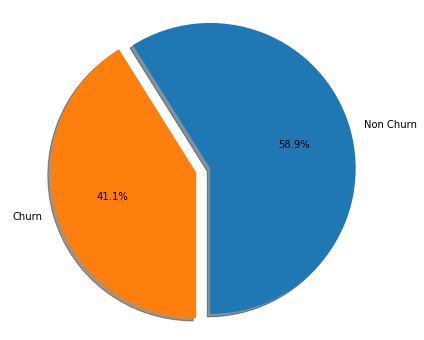

In [16]:
print("The number of customers who accepted the retention call offer : {}".format(retention_offer.shape[0]))
print("Number of customers lost after accepting the retention call: {}".format(retention_offer[retention_offer['Churn']=='Yes'].shape[0]))
print("Number of customers not lost after accepting the retention call : {}".format(retention_offer[retention_offer['Churn']=='No'].shape[0]))
print("Success rate of the retention call proposal: {}".format(retention_offer[retention_offer['Churn']=='No'].shape[0]/retention_offer.shape[0]))

slices=[retention_offer[retention_offer['Churn']=='No'].shape[0],retention_offer[retention_offer['Churn']=='Yes'].shape[0]]
labels=['Non Churn','Churn']
explode=[0,0.1]

fig1, ax1 = plt.subplots(figsize=(7, 6))
ax1.pie(slices, explode=explode, labels=labels,autopct='%1.1f%%',shadow=True, startangle=270)
ax1.axis('equal')  
plt.show()



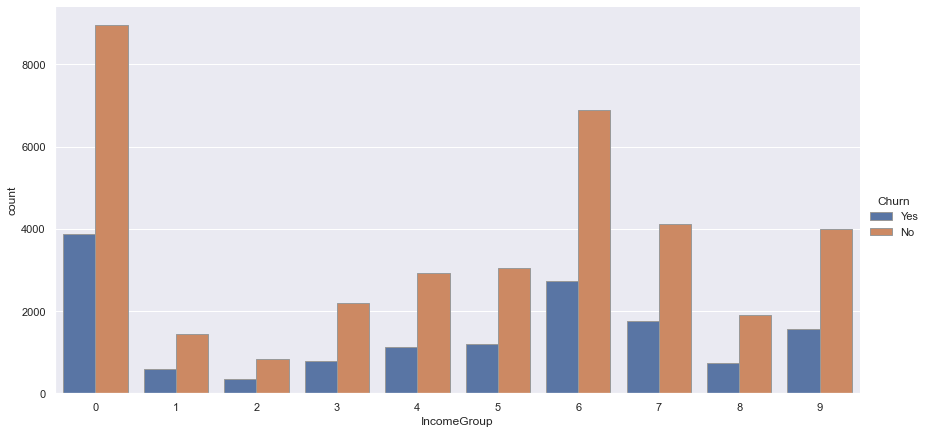

In [17]:
sns.set(style="darkgrid")
sns.catplot(x="IncomeGroup", hue="Churn", kind="count", edgecolor=".6",
            data=train,height=6, aspect=2);

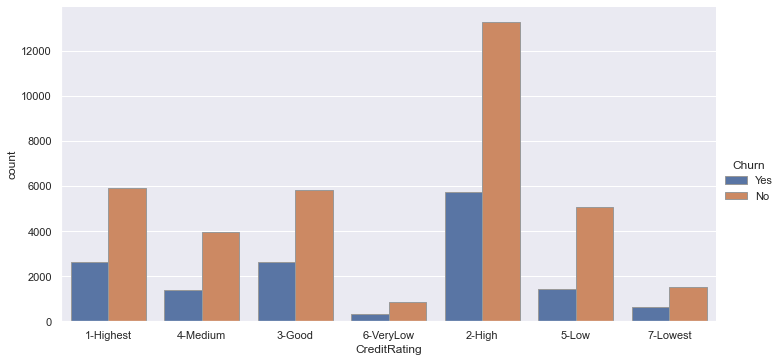

In [18]:
sns.set(style="darkgrid")
sns.catplot(x="CreditRating", hue="Churn", kind="count", edgecolor=".6",
            data=train,height=5, aspect=2);

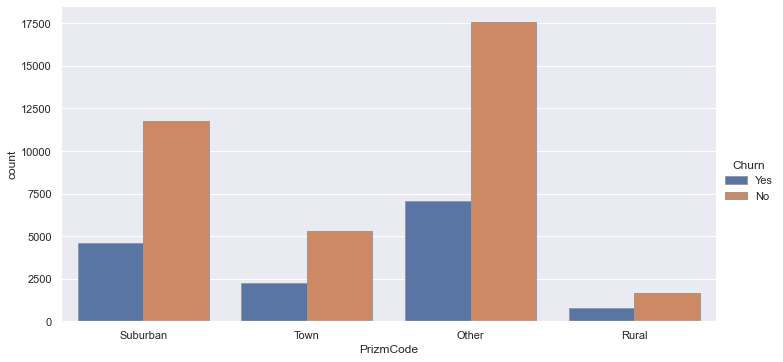

In [19]:
sns.set(style="darkgrid")
sns.catplot(x="PrizmCode", hue="Churn", kind="count", edgecolor=".6",
            data=train,height=5, aspect=2);


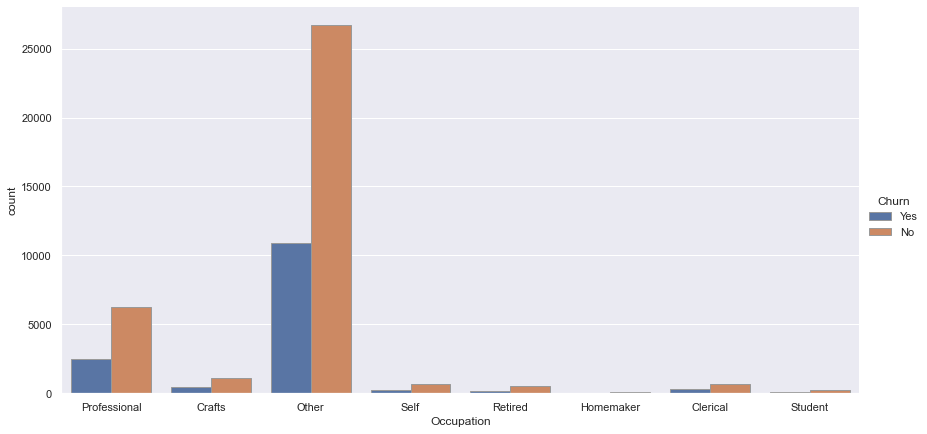

In [20]:
sns.set(style="darkgrid")
sns.catplot(x="Occupation", hue="Churn", kind="count", edgecolor=".6",
            data=train,height=6, aspect=2);


In [21]:
print("Categorical Var. : {}".format(train.select_dtypes(exclude=['int', 'float']).columns))

print("Numeric Var. : {}".format(train.select_dtypes(include=['int', 'float']).columns))

Categorical Var. : Index(['Churn', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'ServiceArea',
       'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner',
       'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGroup',
       'OwnsMotorcycle', 'AdjustmentsToCreditRating', 'HandsetPrice',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatus', 'ChurnSubs'],
      dtype='object')
Numeric Var. : Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 

# Missing Values

In [22]:
train.columns[train.isnull().any()]

Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'ServiceArea', 'Handsets',
       'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2',
       'HandsetPrice'],
      dtype='object')

In [23]:
test.columns[test.isnull().any()]

Index(['Churn', 'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'ServiceArea', 'AgeHH1',
       'AgeHH2', 'HandsetPrice'],
      dtype='object')

In [24]:
train_missings=train.filter(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'ServiceArea', 'Handsets',
       'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2',
       'HandsetPrice'], axis=1)

In [25]:
test_missings=test.filter(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'ServiceArea', 'AgeHH1',
       'AgeHH2', 'HandsetPrice'],axis=1)

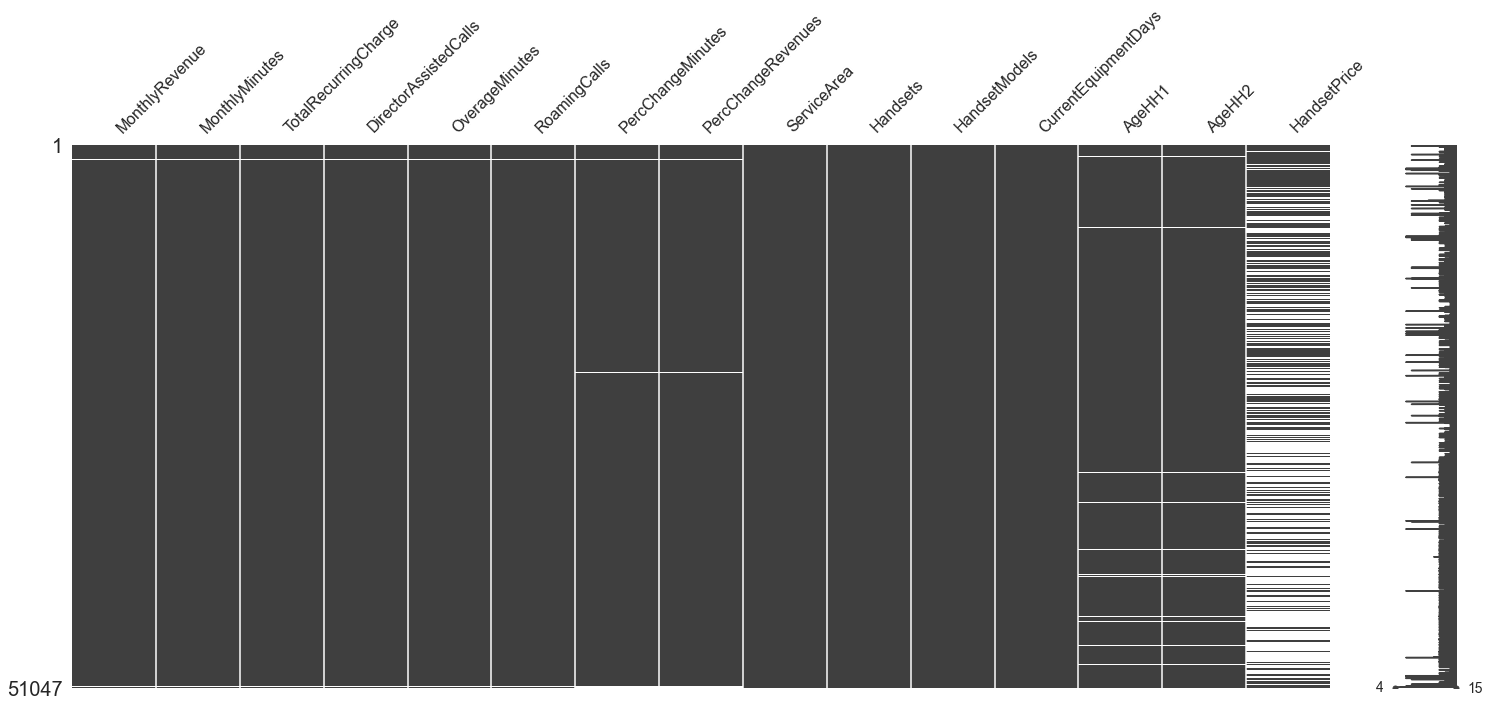

In [26]:
msno.matrix(train_missings);

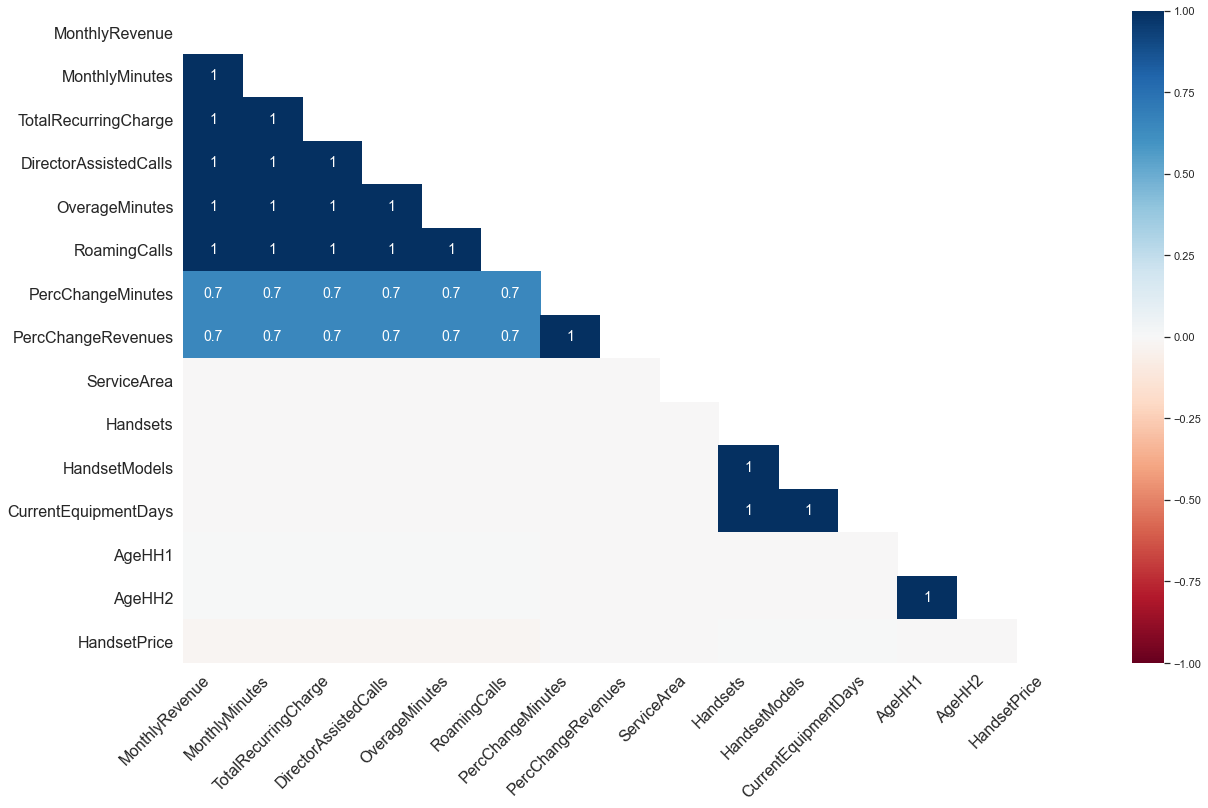

In [27]:
msno.heatmap(train_missings); #A value near -1 means if one variable appears then the other variable is very likely to be missing.
                    #A value near 0 means there is no dependence between the occurrence of missing values of two variables.
                    #A value near 1 means if one variable appears then the other variable is very likely to be present.


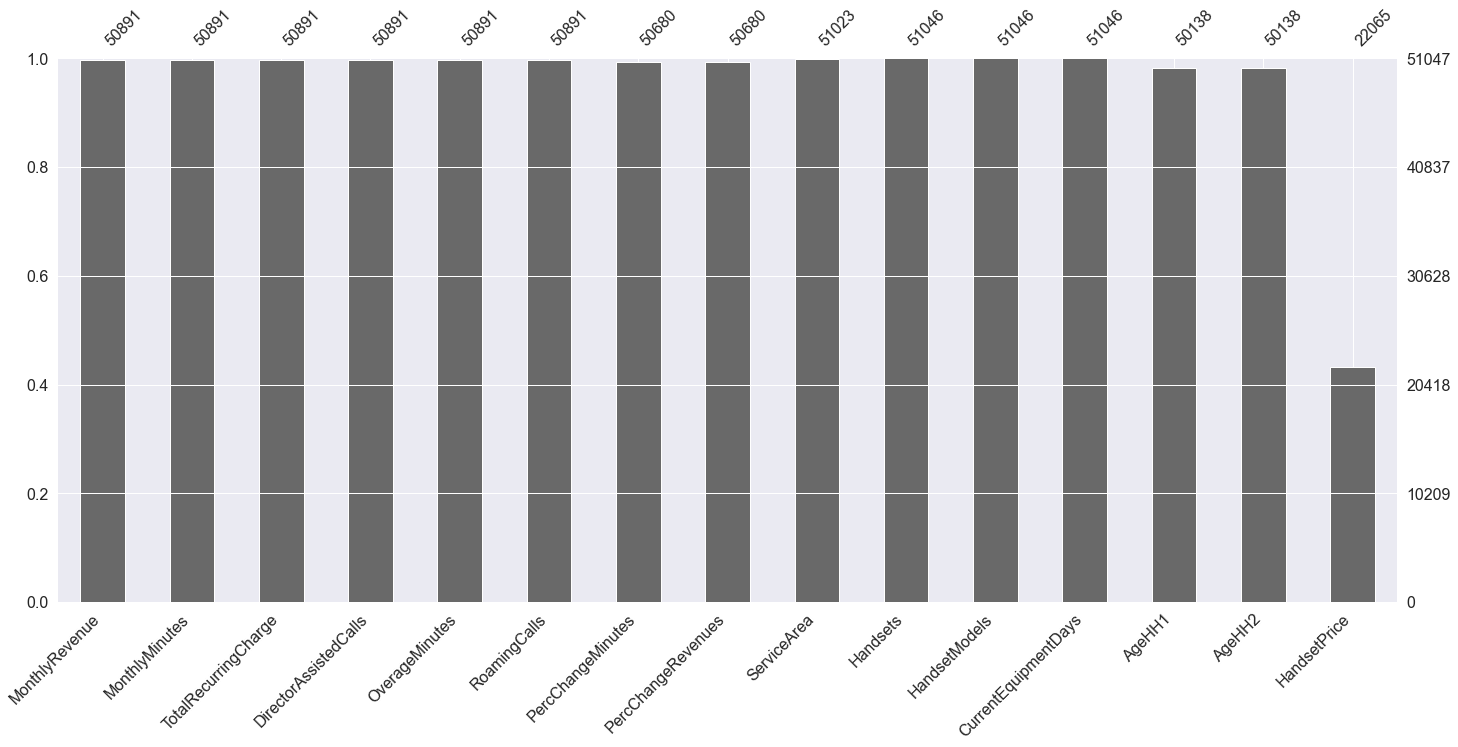

In [28]:
msno.bar(train_missings);

In [29]:
train_missings.describe()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2
count,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50680.000000,50680.000000,51046.000000,51046.000000,51046.000000,50138.000000,50138.000000
mean,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,1.805646,1.558751,380.545841,31.338127,21.144142
std,44.507336,529.871063,23.848871,2.228546,96.588076,9.818294,257.514772,39.574915,1.331173,0.905932,253.801982,22.094635,23.931368
min,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,1.000000,1.000000,-5.000000,0.000000,0.000000
25%,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,1.000000,1.000000,205.000000,0.000000,0.000000
50%,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,1.000000,1.000000,329.000000,36.000000,0.000000
75%,71.065000,723.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,2.000000,2.000000,515.000000,48.000000,42.000000
max,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,24.000000,15.000000,1812.000000,99.000000,99.000000


In [30]:
def values_table(train_missings):
        mis_val = train_missings.isnull().sum()
        mis_val_percent = 100 * train_missings.isnull().sum() / len(train_missings)
        mean=train_missings.mean()
        median=train_missings.median()
        total=train_missings.count()
        zeros=train_missings[train_missings==0].count()
        table = pd.concat([ mis_val,mis_val_percent, mean, median, total, zeros], axis=1)
        table = table.rename(columns = {0 :'Train Missing Values', 1 : '% of Train Total Values', 2 : 'Mean'
                                       , 3 : 'Median' , 4 : '# of Values' , 5 : '# of Zeros'})
        table['Data Type'] = train_missings.dtypes
        table = table[table.iloc[:,1] != 0].sort_values('% of Train Total Values', ascending=False).round(1)
        print ("There are " + str(train.shape[1]) + " columns and " + str(train.shape[0]) + " rows in the dataset.\n"      
             + str(table.shape[0]) + " of these columns have missing variables.")
        return table

values_table(train_missings)

There are 58 columns and 51047 rows in the dataset.
15 of these columns have missing variables.


,Train Missing Values,% of Train Total Values,Mean,Median,# of Values,# of Zeros,Data Type
HandsetPrice,28982,56.8,NaN,60.0,22065,0,object
AgeHH1,909,1.8,31.3,36.0,50138,13917,float64
AgeHH2,909,1.8,21.1,0.0,50138,26087,float64
PercChangeMinutes,367,0.7,-11.5,-5.0,50680,1124,float64
PercChangeRevenues,367,0.7,-1.2,-0.3,50680,5818,float64
MonthlyRevenue,156,0.3,58.8,48.5,50891,6,float64
MonthlyMinutes,156,0.3,525.7,366.0,50891,723,float64
TotalRecurringCharge,156,0.3,46.8,45.0,50891,160,float64
DirectorAssistedCalls,156,0.3,0.9,0.2,50891,24512,float64
OverageMinutes,156,0.3,40.0,3.0,50891,23262,float64


In [31]:
train_1=train.copy()
test_1=test.copy()

In [32]:
churn=train_1[train_1['Churn']=='Yes']
non_churn= train_1[train_1['Churn']=='No']
churn.describe()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,ChurnSubs
count,14641.000000,14641.000000,14641.000000,14641.000000,14641.000000,14641.000000,14503.000000,14503.000000,14711.000000,14711.000000,...,14711.000000,14711.000000,14462.000000,14462.000000,14711.000000,14711.000000,14711.000000,14711.000000,14711.000000,14711.000000
mean,57.995041,483.827471,44.529882,0.826793,42.529472,1.404358,-25.458388,-0.497111,5.792638,3.990538,...,1.501733,421.903881,30.306043,20.445927,0.058392,0.026103,0.046904,4.261845,0.043641,0.227721
std,44.505934,504.634392,22.990134,1.954381,93.172832,11.106095,269.493300,46.652335,8.834394,10.691814,...,0.863085,259.940076,22.013043,23.536945,0.258222,0.169771,0.240896,3.164527,0.297278,1.318878
min,0.000000,0.000000,-11.000000,0.000000,0.000000,0.000000,-2868.000000,-851.100000,0.000000,0.000000,...,1.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.520000,132.000000,30.000000,0.000000,0.000000,0.000000,-101.000000,-7.750000,0.700000,0.000000,...,1.000000,249.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.520000,330.000000,44.000000,0.250000,4.000000,0.000000,-11.000000,-0.300000,3.000000,1.000000,...,1.000000,366.000000,34.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000
75%,69.950000,667.000000,55.000000,0.740000,46.000000,0.300000,54.000000,1.700000,7.300000,3.300000,...,2.000000,564.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000
max,861.110000,5410.000000,338.000000,45.790000,2018.000000,850.900000,5192.000000,2483.500000,208.700000,314.700000,...,14.000000,1779.000000,98.000000,99.000000,4.000000,3.000000,9.000000,9.000000,9.000000,143.000000


In [33]:
non_churn.describe()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,ChurnSubs
count,36250.000000,36250.000000,36250.000000,36250.000000,36250.000000,36250.000000,36177.000000,36177.000000,36336.000000,36336.000000,...,36335.000000,36335.000000,35676.000000,35676.000000,36336.000000,36336.000000,36336.000000,36336.000000,36336.000000,36336.000000
mean,59.173538,542.546483,47.759117,0.922870,39.017379,1.168345,-5.971335,-1.470553,6.100094,4.124188,...,1.581836,363.801156,31.756503,21.427178,0.028622,0.015109,0.054161,4.349901,0.058069,0.157612
std,44.504027,538.816505,24.125276,2.329606,97.916838,9.246760,252.341813,36.349778,9.126058,11.048418,...,0.921723,249.334338,22.114216,24.083977,0.180685,0.129644,0.330772,3.127216,0.412795,0.486571
min,-6.170000,0.000000,-9.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,0.000000,...,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.100000,170.000000,30.000000,0.000000,0.000000,0.000000,-78.000000,-6.800000,1.000000,0.000000,...,1.000000,197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,48.815000,381.000000,45.000000,0.250000,2.000000,0.000000,-3.000000,-0.300000,3.000000,1.000000,...,1.000000,310.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000
75%,71.617500,743.000000,60.000000,0.990000,39.000000,0.300000,70.000000,1.600000,7.700000,3.700000,...,2.000000,493.000000,48.000000,44.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000
max,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,4480.000000,1347.000000,221.700000,384.300000,...,15.000000,1812.000000,99.000000,98.000000,3.000000,3.000000,35.000000,9.000000,25.000000,10.000000


In [34]:
train_1['MonthlyRevenue'].fillna(train_1.groupby('Churn')['MonthlyRevenue'].transform('median'), inplace=True)

In [35]:
test_1['MonthlyRevenue'].fillna(test_1['MonthlyRevenue'].mean(),inplace=True)

In [36]:
#Too many missing variables (56.4%) so we dropped it

train_1.drop('HandsetPrice',axis=1, inplace=True)
test_1.drop('HandsetPrice',axis=1, inplace=True)

In [37]:
train_1.drop('MadeCallToRetentionTeam',axis=1, inplace=True)
test_1.drop('MadeCallToRetentionTeam',axis=1, inplace=True)

In [38]:
train_1.drop('MaritalStatus',axis=1, inplace=True)
test_1.drop('MaritalStatus',axis=1, inplace=True)

In [39]:
train_1.drop('Homeownership',axis=1, inplace=True)
test_1.drop('Homeownership',axis=1, inplace=True)

In [40]:
#Although HandsetModels and Handsets appear numeric, they are categorical variables, so it is more correct to fill them with mode.
train_1[train_1['Handsets'].isna()][['HandsetModels','Handsets','CurrentEquipmentDays']] 

,HandsetModels,Handsets,CurrentEquipmentDays
38702,NaN,NaN,NaN


In [41]:
print("Handsets:",train_1.Handsets.mode()[0])
print("HandsetModels:",train_1.HandsetModels.mode()[0])
print("CurrentEquipmentDays:",train_1.CurrentEquipmentDays.mode()[0])

Handsets: 1.0
HandsetModels: 1.0
CurrentEquipmentDays: 202.0


In [42]:
train_1['Handsets'].fillna(train_1['Handsets'].mode()[0],inplace=True)

In [43]:
train_1['HandsetModels'].fillna(train_1['HandsetModels'].mode()[0],inplace=True)

In [44]:
train_1['CurrentEquipmentDays'].value_counts()

202.0     159
313.0     156
212.0     149
199.0     147
308.0     147
         ... 
1515.0      1
1397.0      1
1712.0      1
1724.0      1
1310.0      1
Name: CurrentEquipmentDays, Length: 1438, dtype: int64

In [45]:
train_1['CurrentEquipmentDays'].fillna(train_1['CurrentEquipmentDays'].mode()[0],inplace=True)

In [46]:
train_1['ServiceArea'].fillna(train_1['ServiceArea'].mode()[0],inplace=True)
test_1['ServiceArea'].fillna(test_1['ServiceArea'].mode()[0],inplace=True)

In [47]:
train_1['AgeHH1'].fillna(value=0,inplace=True)
test_1['AgeHH1'].fillna(value=0,inplace=True)

In [48]:
train_1['AgeHH2'].fillna(value=0,inplace=True)
test_1['AgeHH2'].fillna(value=0,inplace=True)

In [49]:
display(train_1.groupby(['Churn'],as_index=False)['MonthlyMinutes'].median().style.hide_index())

Churn,MonthlyMinutes
No,381.000000
Yes,330.000000


In [50]:
train_1['MonthlyMinutes'].fillna(train_1.groupby('Churn')['MonthlyMinutes'].transform('median'), inplace=True)

In [51]:
test_1['MonthlyMinutes'].fillna(test_1['MonthlyMinutes'].median(), inplace=True)

In [52]:
train_1['TotalRecurringCharge'].fillna(train_1['TotalRecurringCharge'].median(),inplace=True)
test_1['TotalRecurringCharge'].fillna(test_1['TotalRecurringCharge'].median(),inplace=True)

In [53]:
train_1['PercChangeRevenues'].fillna(train_1['PercChangeRevenues'].median(),inplace=True)
test_1['PercChangeRevenues'].fillna(test_1['PercChangeRevenues'].median(),inplace=True)

In [54]:
train_1['PercChangeMinutes'].fillna(train_1['PercChangeMinutes'].median(),inplace=True)
test_1['PercChangeMinutes'].fillna(train_1['PercChangeMinutes'].median(),inplace=True)

In [55]:
train_1['RoamingCalls'].fillna(value=0,inplace=True)
test_1['RoamingCalls'].fillna(value=0,inplace=True)

In [56]:
train_1['OverageMinutes'].fillna(value=0,inplace=True)
test_1['OverageMinutes'].fillna(value=0,inplace=True)

In [57]:
train_1['DirectorAssistedCalls'].fillna(value=0,inplace=True)
test_1['DirectorAssistedCalls'].fillna(value=0,inplace=True)

In [58]:
train_1.isnull().sum()

Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
ServiceArea                  0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
ChildrenInHH                 0
HandsetR

# Outliers Detection

In [59]:
print ("There are " + str(train_1.shape[1]) + " columns and  " + str(train_1.shape[0]) + " rows in the train data.\n")
print("There are " + str(test_1.shape[1]) + " columns and " + str(test_1.shape[0]) + " rows in the test data.\n")

There are 54 columns and  51047 rows in the train data.

There are 54 columns and 20000 rows in the test data.



In [60]:
from scipy.stats import zscore
from scipy import stats 

train_yeni=train_1.select_dtypes(include=['int', 'float'])
train_yeni.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2
0,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,...,58.0,24.0,1.3,0.0,0.3,2.0,2.0,361.0,62.0,0.0
1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,...,5.0,1.0,0.3,0.0,0.0,2.0,1.0,1504.0,40.0,42.0
2,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,...,1.3,3.7,0.0,0.0,0.0,1.0,1.0,1812.0,26.0,26.0
3,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,...,555.7,303.7,59.7,0.0,22.7,9.0,4.0,458.0,30.0,0.0
4,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,3.0,852.0,46.0,54.0


In [61]:
train_new = train_yeni.copy()
outliers={}
for col in train_yeni:
    z_score = zscore(train_yeni[col])
    upper_replace_value = train_yeni[z_score<=3][col].max()
    lower_replace_value = train_yeni[z_score>=-3][col].min()
    train_new = train_yeni.copy()
    outliers[col] = len(train_new[col][(train_new[col] > upper_replace_value)| (train_new[col] < lower_replace_value)])

In [62]:
outliers_zscore=pd.DataFrame(outliers.items(),columns=['Feature','Outliers'])
outliers_zscore

,Feature,Outliers
0,MonthlyRevenue,880
1,MonthlyMinutes,914
2,TotalRecurringCharge,541
3,DirectorAssistedCalls,837
4,OverageMinutes,901
5,RoamingCalls,315
6,PercChangeMinutes,1102
7,PercChangeRevenues,841
8,DroppedCalls,987
9,BlockedCalls,819


In [63]:
train_new1 = train_yeni.copy()
outliers_1={}
for col in train_yeni:
    q1 = train_yeni[col].quantile(q=0.15)
    q3 = train_yeni[col].quantile(q=0.85)
    iqr = stats.iqr(train_yeni[col]) 
    train_new1 = train_yeni.copy()
    upper_limit = q3 + 1.5*iqr
    lower_limit = q1 - 1.5*iqr
    outliers_1[col] = len(train_new1[col][(train_new1[col] > upper_limit)| (train_new1[col] < lower_limit)])

In [64]:
outliers_iqr=pd.DataFrame(outliers_1.items(),columns=['Feature','Outliers'])
outliers_iqr

,Feature,Outliers
0,MonthlyRevenue,2157
1,MonthlyMinutes,1553
2,TotalRecurringCharge,560
3,DirectorAssistedCalls,3920
4,OverageMinutes,4000
5,RoamingCalls,6659
6,PercChangeMinutes,4947
7,PercChangeRevenues,9679
8,DroppedCalls,2524
9,BlockedCalls,3966


In [65]:
train_new2 = train_yeni.copy()
outliers_2={}
for col in train_yeni:
    lower_lim = train_yeni[col].quantile(q=0.01)
    upper_lim = train_yeni[col].quantile(q=0.99)
    outliers_2[col] = len(train_new2[col][(train_new2[col] > upper_lim)| (train_new2[col] < lower_lim)])

In [66]:
outliers_hard=pd.DataFrame(outliers_2.items(),columns=['Feature','Outliers'])
outliers_hard

,Feature,Outliers
0,MonthlyRevenue,935
1,MonthlyMinutes,511
2,TotalRecurringCharge,975
3,DirectorAssistedCalls,490
4,OverageMinutes,511
5,RoamingCalls,510
6,PercChangeMinutes,1021
7,PercChangeRevenues,1022
8,DroppedCalls,493
9,BlockedCalls,510


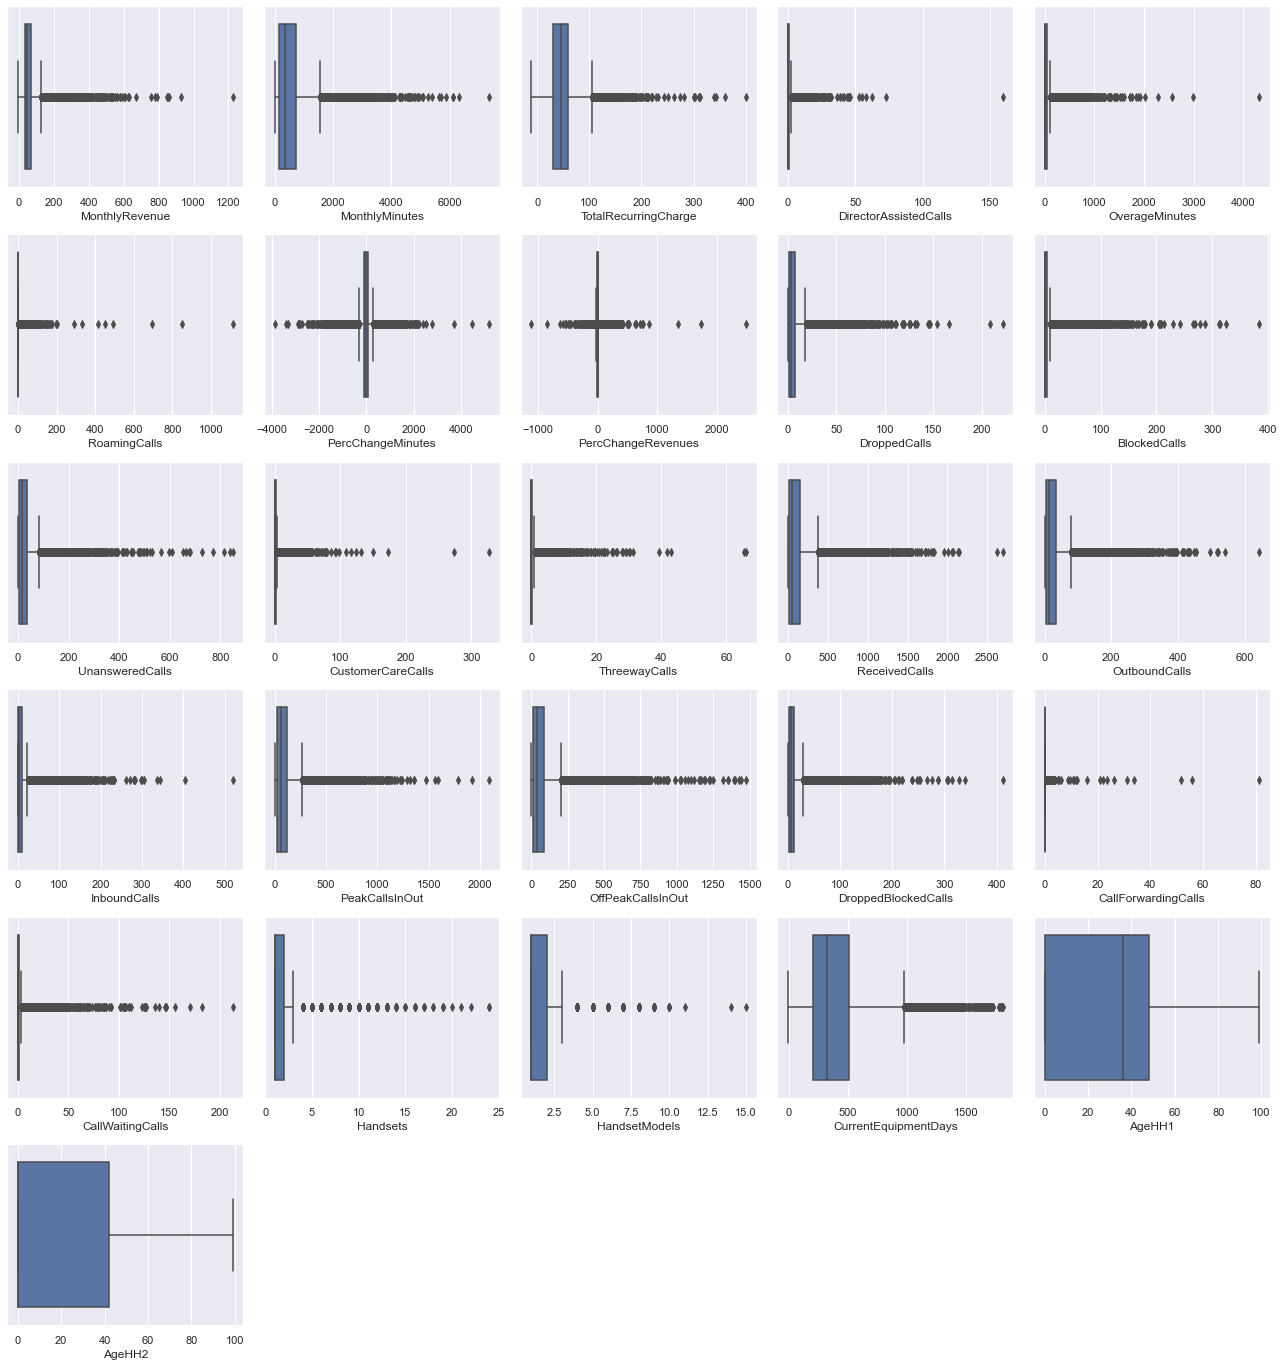

In [67]:
plt.figure(figsize=(18,25))
for num,col in enumerate(train_yeni.select_dtypes(exclude=['object']).columns,1):
    plt.subplot(8, 5, num)
    sns.boxplot(train_yeni[col])
    plt.tight_layout()

# **Label Encoding**

In [68]:
train_df=train_1.copy()
for i in train_df.columns:
      if train_df[i].dtype=='object':
            print(pd.DataFrame(train_df[i].value_counts()))

     Churn
No   36336
Yes  14711
           ServiceArea
NYCBRO917         1708
HOUHOU281         1510
DALDAL214         1498
NYCMAN917         1182
APCFCH703          783
...                ...
NCRMON704            1
OHIOXF513            1
SFRVAC707            1
ATLSEN662            1
ATLWMP870            1

[747 rows x 1 columns]
     ChildrenInHH
No          38679
Yes         12368
     HandsetRefurbished
No                43956
Yes                7091
     HandsetWebCapable
Yes              46046
No                5001
     TruckOwner
No        41524
Yes        9523
     RVOwner
No     46894
Yes     4153
     BuysViaMailOrder
No              32596
Yes             18451
     RespondsToMailOffers
No                  31821
Yes                 19226
     OptOutMailings
No            50295
Yes             752
     NonUSTravel
No         48168
Yes         2879
     OwnsComputer
No          41583
Yes          9464
     HasCreditCard
Yes          34503
No           16544
     NewCellphoneUs

In [69]:
train_1.drop('ServiceArea',axis=1, inplace=True)
test_1.drop('ServiceArea',axis=1, inplace=True)

In [70]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
def FunLabelEncoder(train_df):
    for c in train_df.columns:
        if train_df.dtypes[c] == object:
            enc.fit(train_df[c].astype(str))
            train_df[c] = enc.transform(train_df[c].astype(str))
    return train_df

In [71]:
train_df = FunLabelEncoder(train_df)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      51047 non-null  int32  
 1   MonthlyRevenue             51047 non-null  float64
 2   MonthlyMinutes             51047 non-null  float64
 3   TotalRecurringCharge       51047 non-null  float64
 4   DirectorAssistedCalls      51047 non-null  float64
 5   OverageMinutes             51047 non-null  float64
 6   RoamingCalls               51047 non-null  float64
 7   PercChangeMinutes          51047 non-null  float64
 8   PercChangeRevenues         51047 non-null  float64
 9   DroppedCalls               51047 non-null  float64
 10  BlockedCalls               51047 non-null  float64
 11  UnansweredCalls            51047 non-null  float64
 12  CustomerCareCalls          51047 non-null  float64
 13  ThreewayCalls              51047 non-null  flo

In [72]:
test_df=test_1.copy()
enc = LabelEncoder()
def FunLabelEncoder(tes_df):
    for c in test_df.columns:
        if test_df.dtypes[c] == object:
            enc.fit(test_df[c].astype(str))
            test_df[c] = enc.transform(test_df[c].astype(str))
    return test_df

In [73]:
test_df = FunLabelEncoder(test_df)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 53 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 20000 non-null  int64  
 1   Churn                      0 non-null      float64
 2   MonthlyRevenue             20000 non-null  float64
 3   MonthlyMinutes             20000 non-null  float64
 4   TotalRecurringCharge       20000 non-null  float64
 5   DirectorAssistedCalls      20000 non-null  float64
 6   OverageMinutes             20000 non-null  float64
 7   RoamingCalls               20000 non-null  float64
 8   PercChangeMinutes          20000 non-null  float64
 9   PercChangeRevenues         20000 non-null  float64
 10  DroppedCalls               20000 non-null  float64
 11  BlockedCalls               20000 non-null  float64
 12  UnansweredCalls            20000 non-null  float64
 13  CustomerCareCalls          20000 non-null  flo

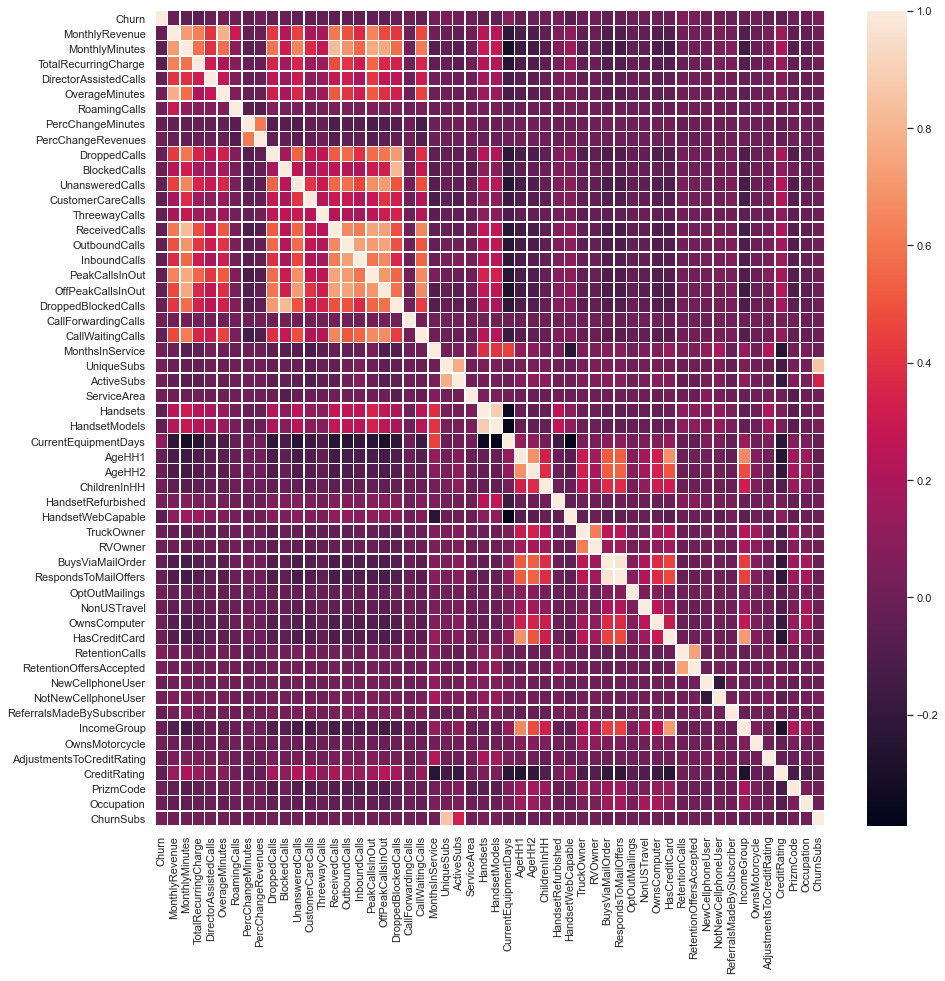

In [74]:
cor = train_df.corr()
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(cor, fmt=".4f", linewidths=0.5, ax=ax);

## Feature Scaling






In [75]:
y = train_df['Churn']
X= train_df.drop(columns=['Churn'],axis=1)

X.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,CreditRating,PrizmCode,Occupation,ChurnSubs
0,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,...,0,0,0,4,0,0,0,2,4,1
1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,...,1,0,0,5,0,0,3,2,4,0
2,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,...,1,0,0,6,0,0,2,3,1,0
3,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,...,1,0,0,6,0,0,3,0,3,0
4,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,...,0,1,0,9,0,1,0,0,4,0


In [76]:
y

0        1
1        1
2        0
3        0
4        1
        ..
51042    1
51043    0
51044    1
51045    0
51046    0
Name: Churn, Length: 51047, dtype: int32

# Train/Test Split,Feature Scaling

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9,stratify=y)

columns = X_train.columns

scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

In [81]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

#Undersampling:Tries to balance data 
undersample = RandomUnderSampler(sampling_strategy='majority')
X_blnc, y_blnc = undersample.fit_resample(X_train, y_train)

print(Counter(y_train))
print(Counter(y_blnc))

Counter({0: 29068, 1: 11769})
Counter({0: 11769, 1: 11769})


In [82]:
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing  import StandardScaler
from sklearn.model_selection import StratifiedKFold 

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

# Classification Algorithms and Optimization

In [86]:
!pip install tpot

  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11959 sha256=00d84c3736ca7d46c3bb5dc307af10432ac6e0ce05947cdaeee78bf071229174
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\a8\bb\8f\6b9328d23c2dcedbfeb8498b9f650d55d463089e3b8fc0bfb2
Successfully built stopit


In [87]:
from tpot import TPOTClassifier
from tpot.config import classifier_config_dict
from sklearn.datasets import load_digits

classifier_config_dict['xgboost.XGBClassifier'] = {
    'n_estimators': [100],
    'max_depth': range(1, 11),
    'learning_rate': [1e-3, 1e-2, 1e-1, 0.5, 1.],
    'subsample': np.arange(0.05, 1.01, 0.05),
    'min_child_weight': range(1, 21),
    'n_jobs': [1], # replace "nthread"
    'verbosity': [0] # add this line to slient warning message
}
        
# for a quick test
tpot = TPOTClassifier(generations=2, population_size=10, verbosity=2,
                      config_dict=classifier_config_dict)
tpot.fit(X_train, y_train)



TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.1, max_depth=8, max_features=0.15000000000000002, min_samples_leaf=9, min_samples_split=17, n_estimators=100, subsample=0.8)


TPOTClassifier(config_dict={'sklearn.cluster.FeatureAgglomeration': {'affinity': ['euclidean',
                                                                                  'l1',
                                                                                  'l2',
                                                                                  'manhattan',
                                                                                  'cosine'],
                                                                     'linkage': ['ward',
                                                                                 'complete',
                                                                                 'average']},
                            'sklearn.decomposition.FastICA': {'tol': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])},
                            'sklearn.decomposition.PC

LogReg


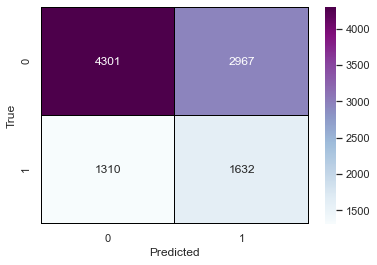

              precision    recall  f1-score   support

           0       0.77      0.59      0.67      7268
           1       0.35      0.55      0.43      2942

    accuracy                           0.58     10210
   macro avg       0.56      0.57      0.55     10210
weighted avg       0.65      0.58      0.60     10210

RF


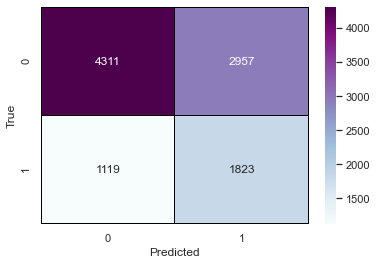

              precision    recall  f1-score   support

           0       0.79      0.59      0.68      7268
           1       0.38      0.62      0.47      2942

    accuracy                           0.60     10210
   macro avg       0.59      0.61      0.58     10210
weighted avg       0.68      0.60      0.62     10210

KNN


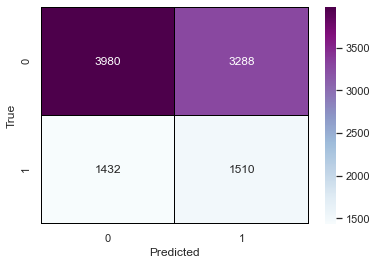

              precision    recall  f1-score   support

           0       0.74      0.55      0.63      7268
           1       0.31      0.51      0.39      2942

    accuracy                           0.54     10210
   macro avg       0.53      0.53      0.51     10210
weighted avg       0.61      0.54      0.56     10210

GaussianNB


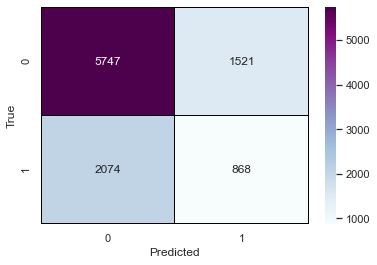

              precision    recall  f1-score   support

           0       0.73      0.79      0.76      7268
           1       0.36      0.30      0.33      2942

    accuracy                           0.65     10210
   macro avg       0.55      0.54      0.54     10210
weighted avg       0.63      0.65      0.64     10210

XGB


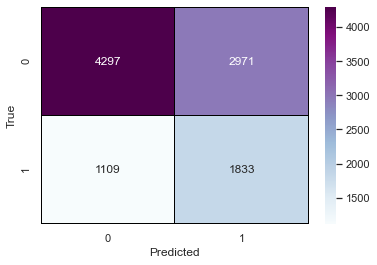

              precision    recall  f1-score   support

           0       0.79      0.59      0.68      7268
           1       0.38      0.62      0.47      2942

    accuracy                           0.60     10210
   macro avg       0.59      0.61      0.58     10210
weighted avg       0.68      0.60      0.62     10210

AdaBoost


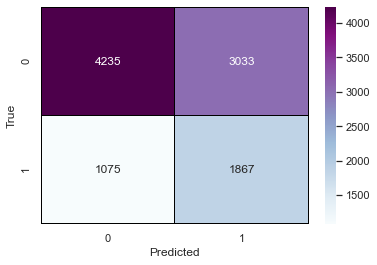

              precision    recall  f1-score   support

           0       0.80      0.58      0.67      7268
           1       0.38      0.63      0.48      2942

    accuracy                           0.60     10210
   macro avg       0.59      0.61      0.57     10210
weighted avg       0.68      0.60      0.62     10210

GradiendtBoost


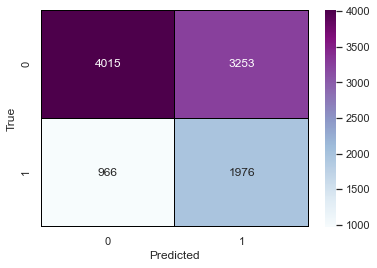

              precision    recall  f1-score   support

           0       0.81      0.55      0.66      7268
           1       0.38      0.67      0.48      2942

    accuracy                           0.59     10210
   macro avg       0.59      0.61      0.57     10210
weighted avg       0.68      0.59      0.61     10210

LightGB


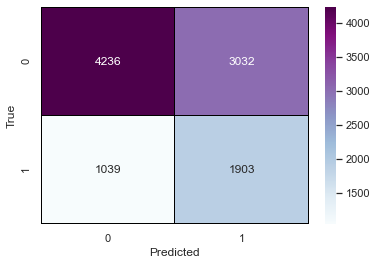

              precision    recall  f1-score   support

           0       0.80      0.58      0.68      7268
           1       0.39      0.65      0.48      2942

    accuracy                           0.60     10210
   macro avg       0.59      0.61      0.58     10210
weighted avg       0.68      0.60      0.62     10210



In [89]:
#Algorithm trials with under sampling :

def run_exps(X_blnc , y_blnc, X_test, y_test):

  models = [
          ('LogReg', LogisticRegression()), 
          ('RF', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('GaussianNB', GaussianNB()),
          ('XGB', XGBClassifier()),
          ('AdaBoost',AdaBoostClassifier()),
          ('GradiendtBoost',GradientBoostingClassifier()),
           ('LightGB',lgb.LGBMClassifier())
        ]

  for name, model in models:

    clf = model.fit(X_blnc , y_blnc)
    y_pred = clf.predict(X_test)
    conf = confusion_matrix(y_test, y_pred)
    print(name)
    sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show() 
    

    print(classification_report(y_test, y_pred))
   
run_exps(X_blnc, y_blnc, X_test, y_test)

LogReg


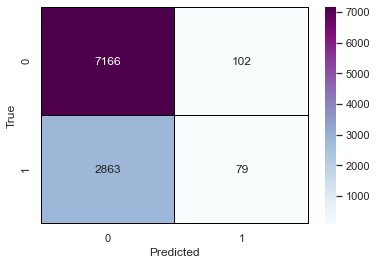

              precision    recall  f1-score   support

           0       0.71      0.99      0.83      7268
           1       0.44      0.03      0.05      2942

    accuracy                           0.71     10210
   macro avg       0.58      0.51      0.44     10210
weighted avg       0.63      0.71      0.60     10210

RF


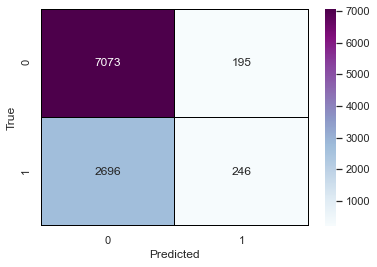

              precision    recall  f1-score   support

           0       0.72      0.97      0.83      7268
           1       0.56      0.08      0.15      2942

    accuracy                           0.72     10210
   macro avg       0.64      0.53      0.49     10210
weighted avg       0.68      0.72      0.63     10210

KNN


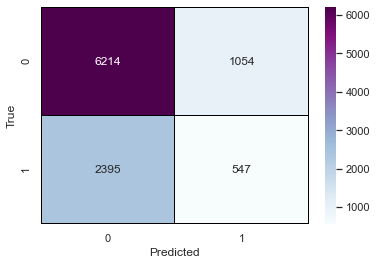

              precision    recall  f1-score   support

           0       0.72      0.85      0.78      7268
           1       0.34      0.19      0.24      2942

    accuracy                           0.66     10210
   macro avg       0.53      0.52      0.51     10210
weighted avg       0.61      0.66      0.63     10210

GaussianNB


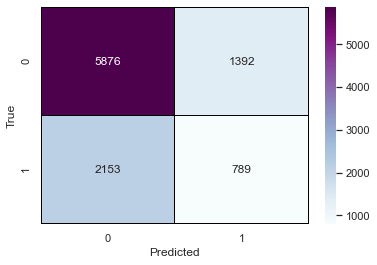

              precision    recall  f1-score   support

           0       0.73      0.81      0.77      7268
           1       0.36      0.27      0.31      2942

    accuracy                           0.65     10210
   macro avg       0.55      0.54      0.54     10210
weighted avg       0.63      0.65      0.64     10210

XGB


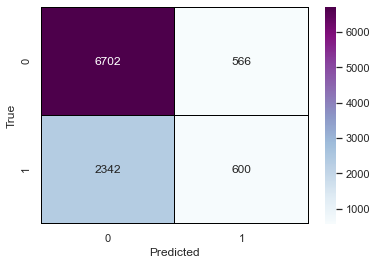

              precision    recall  f1-score   support

           0       0.74      0.92      0.82      7268
           1       0.51      0.20      0.29      2942

    accuracy                           0.72     10210
   macro avg       0.63      0.56      0.56     10210
weighted avg       0.68      0.72      0.67     10210

AdaBoost


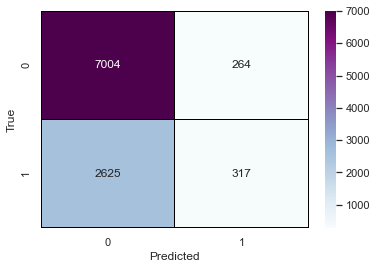

              precision    recall  f1-score   support

           0       0.73      0.96      0.83      7268
           1       0.55      0.11      0.18      2942

    accuracy                           0.72     10210
   macro avg       0.64      0.54      0.50     10210
weighted avg       0.68      0.72      0.64     10210

GradiendtBoost


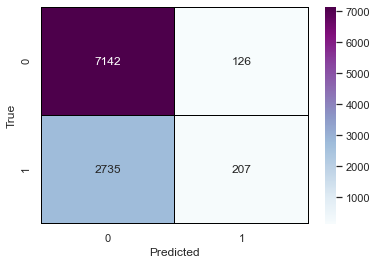

              precision    recall  f1-score   support

           0       0.72      0.98      0.83      7268
           1       0.62      0.07      0.13      2942

    accuracy                           0.72     10210
   macro avg       0.67      0.53      0.48     10210
weighted avg       0.69      0.72      0.63     10210

LightGB


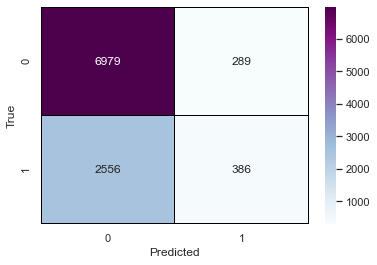

              precision    recall  f1-score   support

           0       0.73      0.96      0.83      7268
           1       0.57      0.13      0.21      2942

    accuracy                           0.72     10210
   macro avg       0.65      0.55      0.52     10210
weighted avg       0.69      0.72      0.65     10210



In [90]:
#Algorithm trials on training and test data

def run_exps(X_train , y_train, X_test, y_test):

  models = [
          ('LogReg', LogisticRegression()), 
          ('RF', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('GaussianNB', GaussianNB()),
          ('XGB', XGBClassifier()),
          ('AdaBoost',AdaBoostClassifier()),
          ('GradiendtBoost',GradientBoostingClassifier()),
           ('LightGB',lgb.LGBMClassifier())
        ]

  for name, model in models:

    clf = model.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    conf = confusion_matrix(y_test, y_pred)
    print(name)
    sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show() 
    

    print(classification_report(y_test, y_pred))
run_exps(X_train , y_train, X_test, y_test)

## Logistic Reg.

In [91]:
LogisticRegression()

LogisticRegression()

              precision    recall  f1-score   support

           0       0.77      0.59      0.67      7268
           1       0.36      0.56      0.44      2942

    accuracy                           0.58     10210
   macro avg       0.56      0.58      0.55     10210
weighted avg       0.65      0.58      0.60     10210



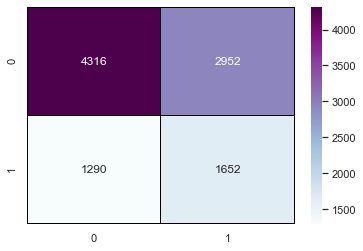

In [92]:
class_weight= {0: 0.65, 1: 1.7}
log=LogisticRegression(class_weight='balanced',penalty='l2',max_iter=150)
clf_log=log.fit(X_train, y_train)
y_pred= clf_log.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
print(classification_report(y_test, y_pred))


Logistic: f1=0.438 auc=0.365


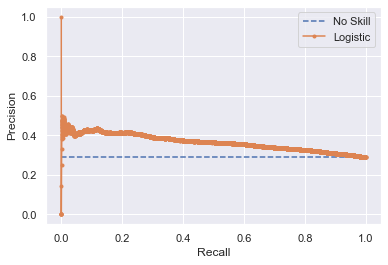

In [93]:
clf_log=log.fit(X_train, y_train)
lr_probs =clf_log.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
y_pred= clf_log.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)

print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')

pyplot.legend()

pyplot.show()

In [94]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred1= clf_log.predict_proba(X_test)[:,1]

print(roc_auc_score(y_test, y_pred1 , average = 'macro'))

0.6054694558941218


In [95]:
a=len(train_df)/2
a/len(non_churn),a/len(churn)

(0.7024300968736239, 1.7349942220107402)

In [96]:
#Hyperparameter Tuning 

logreg_param = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

skf= StratifiedKFold(n_splits=5, shuffle=True, random_state=250) 
gsearch_log = GridSearchCV(estimator = LogisticRegression(class_weight='balanced',max_iter=150), 
                           param_grid = logreg_param, 
                           scoring='roc_auc',
                           verbose=3,
                           cv=skf)

grid_log=gsearch_log.fit(X_train,y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END ............................C=0.001, penalty=l1; total time=   0.0s
[CV 2/5] END ............................C=0.001, penalty=l1; total time=   0.0s
[CV 3/5] END ............................C=0.001, penalty=l1; total time=   0.0s
[CV 4/5] END ............................C=0.001, penalty=l1; total time=   0.0s
[CV 5/5] END ............................C=0.001, penalty=l1; total time=   0.0s
[CV 1/5] END ............................C=0.001, penalty=l2; total time=   0.1s
[CV 2/5] END ............................C=0.001, penalty=l2; total time=   0.1s
[CV 3/5] END ............................C=0.001, penalty=l2; total time=   0.2s
[CV 4/5] END ............................C=0.001, penalty=l2; total time=   0.2s
[CV 5/5] END ............................C=0.001, penalty=l2; total time=   0.1s
[CV 1/5] END .............................C=0.01, penalty=l1; total time=   0.0s
[CV 2/5] END .............................C=0.01

In [97]:
print("Best: %f using %s" % (grid_log.best_score_, grid_log.best_params_))

means = grid_log.cv_results_['mean_test_score']
stds = grid_log.cv_results_['std_test_score']
params = grid_log.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.619492 using {'C': 0.01, 'penalty': 'l2'}
nan (nan) with: {'C': 0.001, 'penalty': 'l1'}
0.618532 (0.004400) with: {'C': 0.001, 'penalty': 'l2'}
nan (nan) with: {'C': 0.01, 'penalty': 'l1'}
0.619492 (0.004894) with: {'C': 0.01, 'penalty': 'l2'}
nan (nan) with: {'C': 0.1, 'penalty': 'l1'}
0.619398 (0.004950) with: {'C': 0.1, 'penalty': 'l2'}
nan (nan) with: {'C': 1.0, 'penalty': 'l1'}
0.619344 (0.004947) with: {'C': 1.0, 'penalty': 'l2'}
nan (nan) with: {'C': 10.0, 'penalty': 'l1'}
0.619336 (0.004948) with: {'C': 10.0, 'penalty': 'l2'}
nan (nan) with: {'C': 100.0, 'penalty': 'l1'}
0.619335 (0.004945) with: {'C': 100.0, 'penalty': 'l2'}
nan (nan) with: {'C': 1000.0, 'penalty': 'l1'}
0.619334 (0.004945) with: {'C': 1000.0, 'penalty': 'l2'}


## Random Forest

In [98]:
RandomForestClassifier()

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.74      0.91      0.82      7268
           1       0.49      0.22      0.30      2942

    accuracy                           0.71     10210
   macro avg       0.62      0.56      0.56     10210
weighted avg       0.67      0.71      0.67     10210



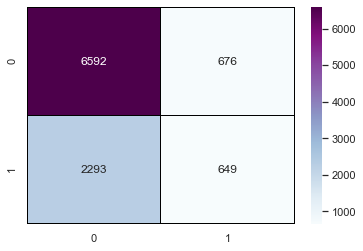

In [99]:
rf_param = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                }
rf=RandomForestClassifier(class_weight='balanced',max_features=3,min_samples_split=3,min_samples_leaf=3,bootstrap=False)
clf_rf=rf.fit(X_train, y_train)
y_pred= clf_rf.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
print(classification_report(y_test, y_pred))

In [100]:
y_pred1= clf_rf.predict_proba(X_test)[:,1]

print(roc_auc_score(y_test, y_pred1 , average = 'macro'))

0.6559929317754706


## K Neighbors

In [101]:
KNeighborsClassifier()

KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      7268
           1       0.31      0.31      0.31      2942

    accuracy                           0.60     10210
   macro avg       0.52      0.52      0.52     10210
weighted avg       0.60      0.60      0.60     10210



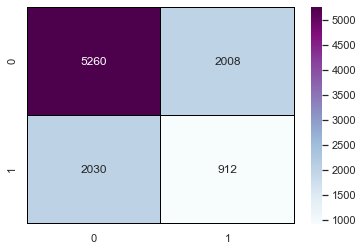

In [102]:
knn=KNeighborsClassifier(weights='distance',n_neighbors=2)
clf_knn=knn.fit(X_train, y_train)
y_pred= clf_knn.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
print(classification_report(y_test, y_pred))

In [103]:
y_pred1= clf_knn.predict_proba(X_test)[:,1]

print(roc_auc_score(y_test, y_pred1 , average = 'macro'))

0.5250967662461226


## AdaBoost

In [104]:
AdaBoostClassifier()

AdaBoostClassifier()

              precision    recall  f1-score   support

           0       0.73      0.96      0.83      7268
           1       0.55      0.11      0.18      2942

    accuracy                           0.72     10210
   macro avg       0.64      0.54      0.50     10210
weighted avg       0.68      0.72      0.64     10210



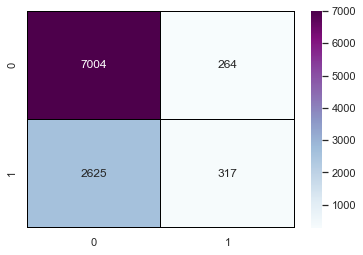

In [105]:
ada=AdaBoostClassifier()
clf_ada=ada.fit(X_train, y_train)
y_pred= clf_ada.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
print(classification_report(y_test, y_pred))

In [106]:
y_pred1= clf_ada.predict_proba(X_test)[:,1]

print(roc_auc_score(y_test, y_pred1 , average = 'macro'))

0.6491632439229619


## XGB

In [107]:
XGBClassifier()

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [108]:
scale_pos_weight = len(non_churn)/len(churn)
scale_pos_weight

2.4699884440214803

              precision    recall  f1-score   support

           0       0.81      0.62      0.70      7268
           1       0.40      0.64      0.49      2942

    accuracy                           0.62     10210
   macro avg       0.61      0.63      0.60     10210
weighted avg       0.69      0.62      0.64     10210



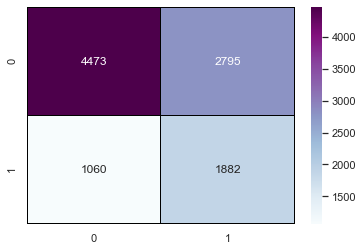

In [109]:
xgb=XGBClassifier(max_depth=3, min_child_weight= 1, scale_pos_weight=scale_pos_weight,
                  learning_rate=0.1, n_estimators= 400,subsample=0.9,colsample_bytree=0.9)
clf_xgb=xgb.fit(X_train, y_train)

y_pred=clf_xgb.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
print(classification_report(y_test, y_pred))

XGB: f1=0.494 auc=0.459


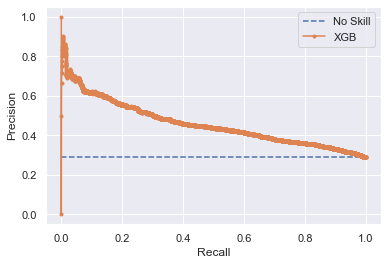

In [110]:
probs =clf_xgb.predict_proba(X_test)
probs = probs[:, 1]
y_pred= clf_xgb.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)

print('XGB: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='XGB')

pyplot.xlabel('Recall')
pyplot.ylabel('Precision')

pyplot.legend()

pyplot.show()

In [111]:
y_pred1= clf_xgb.predict_proba(X_test)[:,1]

print(roc_auc_score(y_test, y_pred1 , average = 'macro'))

0.6759424174659825


In [112]:
#Hyperparameter Tuning 
xgb_param = {
    'max_depth':range(1,6,2),
    'min_child_weight':range(1,6,2),
    'n_estimators':[150,200,300,400],
    'learning_rate':[0.1,0.2,0.3,0.4]
}
skf= StratifiedKFold(n_splits=5, shuffle=True, random_state=250) 
gsearch_xgb = GridSearchCV(estimator = XGBClassifier(scale_pos_weight=scale_pos_weight,
                                                     subsample=0.9,colsample_bytree=0.9), 
                           param_grid = xgb_param, 
                           scoring='roc_auc',
                           verbose=3,
                           cv=skf)

grid_xgb=gsearch_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=150; total time=   3.0s
[CV 2/5] END learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=150; total time=   2.5s
[CV 3/5] END learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=150; total time=   2.3s
[CV 4/5] END learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=150; total time=   2.2s
[CV 5/5] END learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=150; total time=   2.7s
[CV 1/5] END learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=200; total time=   3.0s
[CV 2/5] END learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=200; total time=   3.0s
[CV 3/5] END learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=200; total time=   2.9s
[CV 4/5] END learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=200; total time=   3.2s
[CV 5/5] END learni

In [113]:
print("Best: %f using %s" % (grid_xgb.best_score_, grid_xgb.best_params_))

means = grid_xgb.cv_results_['mean_test_score']
stds = grid_xgb.cv_results_['std_test_score']
params = grid_xgb.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.682079 using {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 400}
0.651101 (0.005753) with: {'learning_rate': 0.1, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 150}
0.655706 (0.005553) with: {'learning_rate': 0.1, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 200}
0.661304 (0.005694) with: {'learning_rate': 0.1, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 300}
0.664845 (0.005543) with: {'learning_rate': 0.1, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 400}
0.651101 (0.005753) with: {'learning_rate': 0.1, 'max_depth': 1, 'min_child_weight': 3, 'n_estimators': 150}
0.655706 (0.005553) with: {'learning_rate': 0.1, 'max_depth': 1, 'min_child_weight': 3, 'n_estimators': 200}
0.661319 (0.005690) with: {'learning_rate': 0.1, 'max_depth': 1, 'min_child_weight': 3, 'n_estimators': 300}
0.664916 (0.005539) with: {'learning_rate': 0.1, 'max_depth': 1, 'min_child_weight': 3, 'n_estimators': 400}
0.651101 (0.005753) with

## LightGBM

In [114]:
lgb.LGBMClassifier()

LGBMClassifier()

              precision    recall  f1-score   support

           0       0.81      0.59      0.68      7268
           1       0.39      0.66      0.49      2942

    accuracy                           0.61     10210
   macro avg       0.60      0.62      0.59     10210
weighted avg       0.69      0.61      0.63     10210



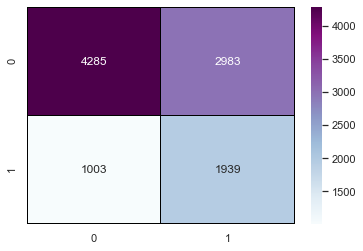

In [115]:
lgbm=lgb.LGBMClassifier(scale_pos_weight=scale_pos_weight,learning_rate=0.3,n_estimators=70,
                   num_leaves=7,min_child_weight=0.001,min_child_samples=20)
clf_lgbm=lgbm.fit(X_train, y_train)
y_pred= clf_lgbm.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
print(classification_report(y_test, y_pred))

In [116]:
y_pred1= clf_lgbm.predict_proba(X_test)[:,1]

print(roc_auc_score(y_test, y_pred1 , average = 'macro'))

0.6721669391018505


In [117]:
#Hyperparameter Tuning 
lgbm_param = {
    'num_leaves': [7, 15, 31],
    'n_estimators':[100,150,200,300]
}

gsearch_lgbm = GridSearchCV(estimator = lgb.LGBMClassifier(scale_pos_weight=scale_pos_weight,
                                                           min_child_weight=0.001,min_child_samples=20), 
                            param_grid = lgbm_param, 
                            scoring='roc_auc',
                            verbose=3,
                            cv=skf)

grid_lgbm=gsearch_lgbm.fit(X_train,y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .................n_estimators=100, num_leaves=7; total time=   0.7s
[CV 2/5] END .................n_estimators=100, num_leaves=7; total time=   0.5s
[CV 3/5] END .................n_estimators=100, num_leaves=7; total time=   0.6s
[CV 4/5] END .................n_estimators=100, num_leaves=7; total time=   0.5s
[CV 5/5] END .................n_estimators=100, num_leaves=7; total time=   0.5s
[CV 1/5] END ................n_estimators=100, num_leaves=15; total time=   0.7s
[CV 2/5] END ................n_estimators=100, num_leaves=15; total time=   0.7s
[CV 3/5] END ................n_estimators=100, num_leaves=15; total time=   0.7s
[CV 4/5] END ................n_estimators=100, num_leaves=15; total time=   0.7s
[CV 5/5] END ................n_estimators=100, num_leaves=15; total time=   0.7s
[CV 1/5] END ................n_estimators=100, num_leaves=31; total time=   0.9s
[CV 2/5] END ................n_estimators=100, n

In [118]:
print("Best: %f using %s" % (grid_lgbm.best_score_, grid_lgbm.best_params_))

means = grid_lgbm.cv_results_['mean_test_score']
stds = grid_lgbm.cv_results_['std_test_score']
params = grid_lgbm.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.681799 using {'n_estimators': 100, 'num_leaves': 15}
0.677243 (0.004561) with: {'n_estimators': 100, 'num_leaves': 7}
0.681799 (0.004401) with: {'n_estimators': 100, 'num_leaves': 15}
0.678137 (0.005782) with: {'n_estimators': 100, 'num_leaves': 31}
0.680284 (0.005101) with: {'n_estimators': 150, 'num_leaves': 7}
0.681702 (0.004677) with: {'n_estimators': 150, 'num_leaves': 15}
0.677748 (0.005626) with: {'n_estimators': 150, 'num_leaves': 31}
0.680827 (0.005378) with: {'n_estimators': 200, 'num_leaves': 7}
0.680659 (0.004414) with: {'n_estimators': 200, 'num_leaves': 15}
0.675712 (0.005187) with: {'n_estimators': 200, 'num_leaves': 31}
0.681402 (0.005679) with: {'n_estimators': 300, 'num_leaves': 7}
0.678639 (0.004736) with: {'n_estimators': 300, 'num_leaves': 15}
0.671668 (0.004489) with: {'n_estimators': 300, 'num_leaves': 31}


# ROC and Precision-Recall Curve





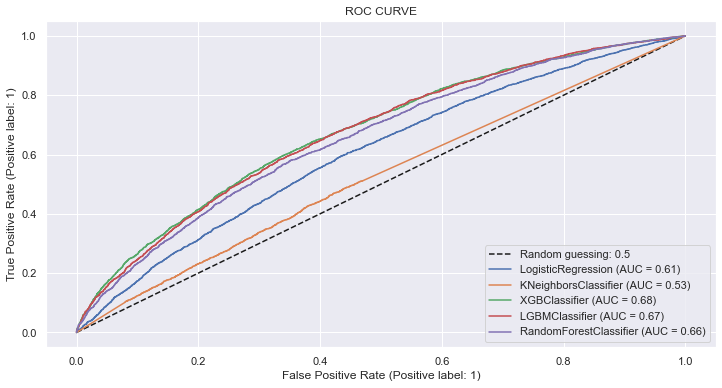

In [119]:
from sklearn.metrics import plot_roc_curve

models = [log,knn,xgb,lgbm,rf]

plt.figure(figsize = (12,6), linewidth= 1)
plt.plot([0,1], [0,1], 'k--', label = 'Random guessing: 0.5')
plt.title("ROC CURVE")
plt.legend(loc="lower right")
ax = plt.gca()

for i in models:
  plot_roc_curve(i, X_test, y_test,ax=ax)

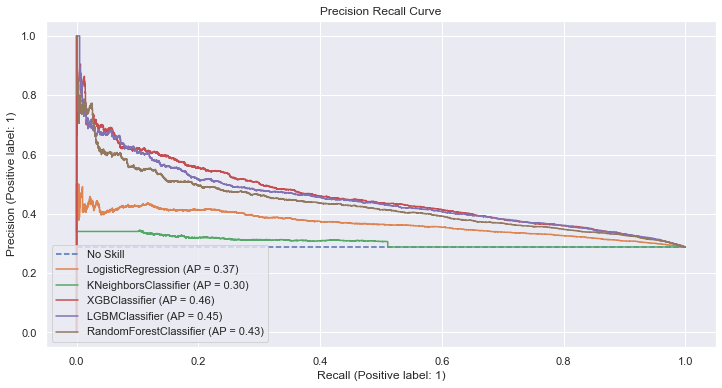

In [120]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

models = [log,knn,xgb,lgbm,rf]

plt.figure(figsize = (12,6), linewidth= 1)
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.title("Precision Recall Curve")
plt.legend(loc="upper left")
ax = plt.gca()

for i in models:
  plot_precision_recall_curve(i, X_test, y_test,ax=ax)
